# Gaussian Naive Bayes
The principle of a Naive Bayes classifier is to compute the probability $P(y \mid x)$ given a sample $x=(x_1,...,x_m)$ using Bayes Rule: $P(y \mid x) = \frac{P(x \mid y)P(y)}{P(x)}$. The classifier will then choose the label $y$ which maximize this probability: $\hat{y}=argmax_y \, P(y \mid x)=argmax_y \, P(x \mid  y)P(y)$ (since the argmax does not depend on $P(x)$). The key assumption of Naive Bayes is that all the features $x_j$ of the random sample vector $x$ are independant conditionally to $y$. Thus we can rewrite our classifier as: $\hat{y}=argmax_y \,  P(x_1,...x_m \mid  y)P(y)=argmax_y \, P(y) \prod_j P(x_j \mid  y)$. $P(y)$ can be taken as the frequency of the label $y$ in our data, while each $P(x_j \mid  y)$ will be assumed to follow a gaussian distribution, whose parameters can be chosen using an MLE estimate (see below).

In [201]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from sklearn.datasets import make_moons, make_circles

## Create data

In [202]:
n = 100

In [329]:
X_train, Y_train = make_circles(n, noise=0.1, factor=0.5, random_state=1)
#X_train, Y_train = make_moons(n, noise=0.1)

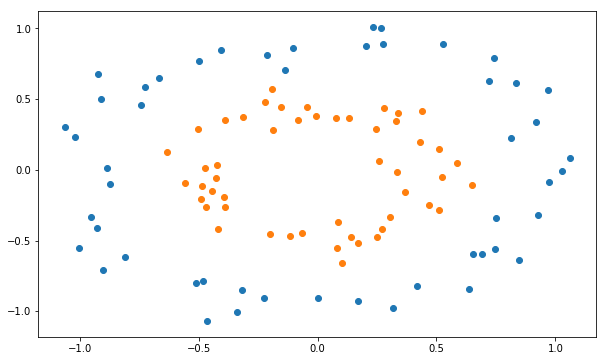

In [330]:
plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1])
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1])

## Define the probability functions

### Extract parameters from the two distributions (y=0 and y=1)
In order to find the best gaussians underlying the data (for each label), we use a Maximum Likelihood Estimate (MLE). By noting $x_j^{(i)}$ the feature j of the sample i and $x_j$ the corresponding random variable, it gives us $\mu_j^y = \frac{1}{n} \sum_{i,y=y} x_j^{(i)}$ and $\sigma_j^y = \sqrt{\frac{1}{n} \sum_{i,y=y} (x_j^{(i)} - \mu_j^y)^2}$

In [331]:
mu = np.array([np.mean(X_train[Y_train==y], axis=0) for y in [0,1]])

In [332]:
sigma = np.array([[np.std(X_train[:,0][Y_train==y]), np.std(X_train[:,1][Y_train==y])] for y in [0,1]])

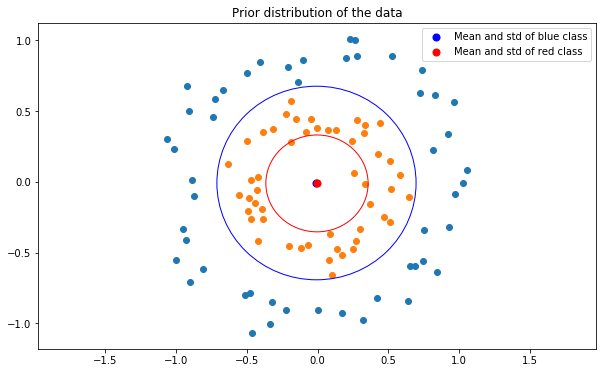

In [341]:
plt.figure()
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['figure.figsize'] = (10, 6)
plt.axes().set_aspect('equal', 'datalim')

width = [sigma[y][0] for y in [0,1]]
height = [sigma[y][1] for y in [0,1]]
color = ["blue", "red"]

ellipse = [mpl.patches.Ellipse(xy=mu[y], width=width[y]*2, height=height[y]*2, angle=0,
                              facecolor='none', edgecolor=color[y]) for y in [0,1]]

ax = plt.gca()
ax.add_patch(ellipse[0])
ax.add_patch(ellipse[1])
ax.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1])
ax.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1])
ax.scatter(mu[0][0], mu[0][1], s=50, color="blue", label="Mean and std of blue class")
ax.scatter(mu[1][0], mu[1][1], s=50, color="red", label="Mean and std of red class")
plt.title("Prior distribution of the data")
plt.legend()

### Create the probability functions

In [342]:
def p_x_given_y(x, y):
    return np.prod([np.exp(-(x[j]-mu[y][j])**2 / (2 * sigma[y][j]**2)) / (np.sqrt(2*np.pi)*sigma[y][j]) for j in range(len(x))])

In [343]:
def p_y(y):
    return np.sum(Y_train==y) / len(Y_train)

In [344]:
def p_y_given_x(x, y):
    return p_x_given_y(x,y) * p_y(y)

## Perform predictions on a grid

In [345]:
def predict(X):
    return np.array([np.argmax([p_y_given_x(X[i], 0), p_y_given_x(X[i], 1)]) for i in range(len(X))])

def predict_proba(X):
    return np.array([p_y_given_x(X[i], 1) / (p_y_given_x(X[i], 1) + p_y_given_x(X[i], 0)) for i in range(len(X))])

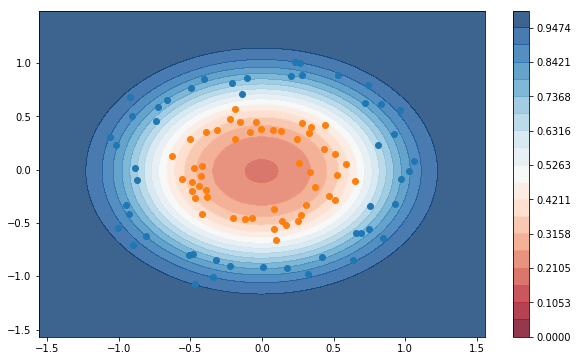

In [346]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
levels = np.linspace(0,1,20)
cm = plt.cm.RdBu
Z = predict_proba(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, 1-Z, levels, cmap=cm, alpha=.8)
plt.colorbar()

plt.scatter(X_train[Y_train==0,0], X_train[Y_train==0,1])
plt.scatter(X_train[Y_train==1,0], X_train[Y_train==1,1])

In [328]:
predict(X_train[Y_train==1])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])